In [1]:
def print_greeting():
    print('Hello')
    print('The weather today is frightful.')
    print('Let it snow. ' * 3)

In [2]:
print_greeting()

Hello
The weather today is frightful.
Let it snow. Let it snow. Let it snow. 


In [3]:
def print_date(year, month, day):
    joined = str(year) + '/' + str(month) + '/' + str(day)
    print(joined)

In [4]:
print_date(1871, 3, 11)

1871/3/11


In [5]:
print_date(month=3, year=1871, day=19)

1871/3/19


In [6]:
result = print_date(month=3, year=1871, day=19)

1871/3/19


In [7]:
result

In [8]:
print(result)

None


In [9]:
def average(values):
    if len(values) == 0:
        return None
    return sum(values) / len(values)

In [10]:
a = average([1, 2, 3])
print(a)

2.0


In [11]:
average()

TypeError: average() missing 1 required positional argument: 'values'

In [12]:
average([])

In [13]:
print("average is", average)

average is <function average at 0x103967f60>


Write a program that reads in the regional data sets and plots the average GDP per capita for each region over time in a single chart.

**N.B.** This actually belongs in lesson 14 (looping).

In [14]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
"data/gapminder_gdp_africa.csv".split('_')[-1][:-4]

'africa'

region Americas
region Europe
region Oceania
region Africa
region Asia


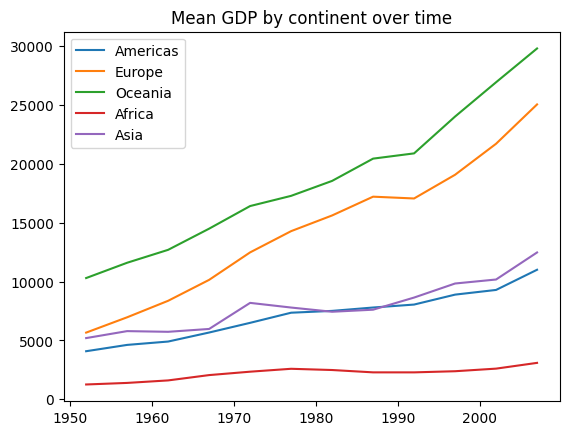

In [36]:
fig, ax = plt.subplots(1,1)

for filename in glob.glob('data/gapminder_gdp*.csv'):
    dataframe = pd.read_csv(filename, index_col='country')
    # extract <region> from the filename, expected to be in the format 'data/gapminder_gdp_<region>.csv'.
    # we will split the string using the split method and `_` as our separator,
    # retrieve the last string in the list that split returns (`<region>.csv`), 
    # and then remove the `.csv` extension from that string.
    region = filename.split('_')[-1][:-4].title()
    print("region", region)
    if region == 'Americas': # the americas CSV has an extra continent column. Remove it.
        dataframe = dataframe.drop(columns='continent')
    # remove the "gdpPercap_" from each column name and convert the remaining portion to integer years.
    dataframe.columns = dataframe.columns.str.replace("gdpPercap_","").astype(int)
    dataframe.mean().plot(ax=ax, label=region)

plt.legend()
plt.title("Mean GDP by continent over time")
plt.savefig('mean_continental_gdps.png')
plt.show()

https://github.com/n2ygk/workshop_2025_01

Here's another (better) solution from the [updated Carpentries lesson](https://swcarpentry.github.io/python-novice-gapminder/14-looping-data-sets.html). This makes a few improvements:
1. Ignores the non-numberic columns in general rather than dropping the extra `continent` column from Americs.
2. Adds specific year x-axis ticks and labels corresponding to the dataframe's 1952, 1957, ....

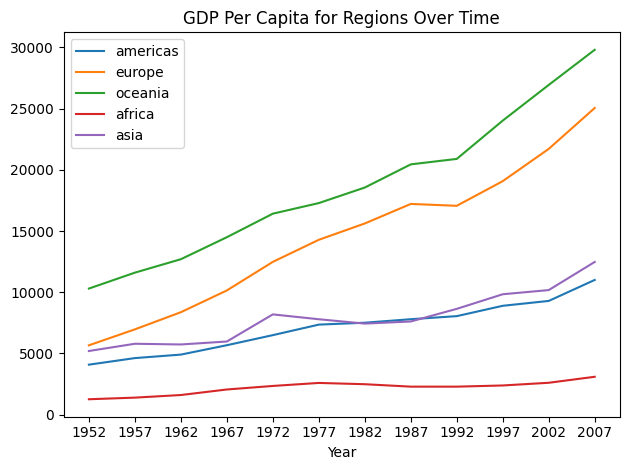

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
for filename in glob.glob('data/gapminder_gdp*.csv'):
    dataframe = pd.read_csv(filename)
    # extract <region> from the filename, expected to be in the format 'data/gapminder_gdp_<region>.csv'.
    # we will split the string using the split method and `_` as our separator,
    # retrieve the last string in the list that split returns (`<region>.csv`), 
    # and then remove the `.csv` extension from that string.
    # NOTE: the pathlib module covered in the next callout also offers
    # convenient abstractions for working with filesystem paths and could solve this as well:
    # from pathlib import Path
    # region = Path(filename).stem.split('_')[-1]
    region = filename.split('_')[-1][:-4]
    # extract the years from the columns of the dataframe 
    headings = dataframe.columns[1:]
    years = headings.str.split('_').str.get(1)
    # pandas raises errors when it encounters non-numeric columns in a dataframe computation
    # but we can tell pandas to ignore them with the `numeric_only` parameter
    dataframe.mean(numeric_only=True).plot(ax=ax, label=region)
    # NOTE: another way of doing this selects just the columns with gdp in their name using the filter method
    # dataframe.filter(like="gdp").mean().plot(ax=ax, label=region)
# set the title and labels
ax.set_title('GDP Per Capita for Regions Over Time')
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years)
ax.set_xlabel('Year')
plt.tight_layout()
plt.legend()
plt.show()